In [31]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def make_data_1():
    return np.random.normal(0.1, 1, 10000)

def make_data_2():
    a = np.random.normal(-0.9, 0.4, 5000)
    b = np.random.normal(1.1, 0.4, 5000)
    y = np.concatenate((a, b))
    np.random.shuffle(y)
    return y

## Question

Suppose two different machines at a factory are both used to cut pipe to a certain length. They are never perfect; there is always some error in the length they cut. You've collected errors (in millimeters) from the two machines in arrays $Y$ and $Z$. How do you determine if the distribution of errors is different? If a coworker disagrees with you, how can you quantitatively support your hypothesis?

Use the provided data to demonstrate your method.

In [32]:
Y = make_data_1()
Z = make_data_2()

### Answer

We can use the CDFs of $Y$ and $Z$ to answer the question. (Histograms or q-q plots are also appropriate). In practice, you can start by plotting them both; if the CDFs look different, the distributions are probably different.

In [37]:
def cdf(Y):
    sorted_Y = np.sort(Y)
    return sorted_Y, np.linspace(0, 1, len(Y))

In [38]:
xxY, CY = cdf(Y)
xxZ, CZ = cdf(Z)

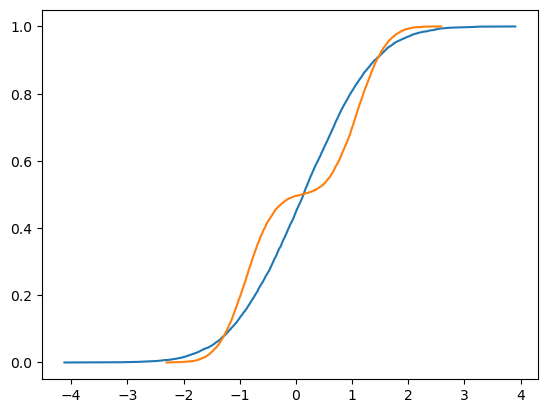

In [39]:
plt.plot(xxY, CY)
plt.plot(xxZ, CZ)

The *Kolmogorov-Smirnov (KS) test* is one way to quantify this idea. To do the KS test, find the $x$ where the CDFs of $Y$ and $Z$ are the furthest apart; the absolute difference in CDFs at this point is the KS statistic. The higher the statistic, the less likely $Y$ and $Z$ are to have come from the same distribution.

There are other variations on this idea that also can work; the KS test isn't the only good option.

In [40]:
def ks(Y, Z):
    xmin = min(min(Y), min(Z))
    xmax = max(max(Y), max(Z))
    K = max(len(Y), len(Z))
    xx = np.linspace(xmin, xmax, K)
    sorted_Y = np.sort(Y)
    CY = np.searchsorted(sorted_Y, xx) / K
    sorted_Z = np.sort(Z)
    CZ = np.searchsorted(sorted_Z, xx) / K
    return np.max(np.abs(CY - CZ))

In [41]:
ks(Y, Z)

0.1526

There is a formula that lets you use the KS test formally, rejecting the hypothesis that $Y$ and $Z$ come from the same different distribution at a given level, etc., but it isn't required to remember how to do that on an interview. It's OK just to get the main idea.

The formal hypothesis test is nice when people don't agree if it's different or not, and you need a way to get at the truth impartially.